<a href="https://colab.research.google.com/github/harishahamed26/Image-Classification-Dog-Cat-Using-CNN/blob/main/ImageClassification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification Using CNN

## Data Preprocessing and EDA

In [1]:
# Importing necessary libraries

import zipfile
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
from tensorflow.keras.preprocessing import image
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

import keras
import tensorflow as tf

from keras.optimizers.optimizer_v2 import adam
from keras.optimizers import SGD, Adam

In [2]:
# Importing the Google Drive 

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Extract the Dataset 
'''

local_zip = '/content/drive/MyDrive/Colab Notebooks/dogs-vs-cats-vvsmall.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/Colab Notebooks/dogs-vs-cats-vvsmall')
zip_ref.close()

'''

"\n\nlocal_zip = '/content/drive/MyDrive/Colab Notebooks/dogs-vs-cats-vvsmall.zip'\nzip_ref = zipfile.ZipFile(local_zip, 'r')\nzip_ref.extractall('/content/drive/MyDrive/Colab Notebooks/dogs-vs-cats-vvsmall')\nzip_ref.close()\n\n"

In [2]:
# Defining the directory for train and test data

Train_Cat_dir = os.path.join('/content/drive/MyDrive/Colab Notebooks/dogs-vs-cats-vvsmall/dogs-vs-cats-vvsmall/train/cats')
Train_Dog_dir = os.path.join('/content/drive/MyDrive/Colab Notebooks/dogs-vs-cats-vvsmall/dogs-vs-cats-vvsmall/train/dogs')

Test_Cat_dir = os.path.join('/content/drive/MyDrive/Colab Notebooks/dogs-vs-cats-vvsmall/dogs-vs-cats-vvsmall/validation/cats')
Test_Dog_dir = os.path.join('/content/drive/MyDrive/Colab Notebooks/dogs-vs-cats-vvsmall/dogs-vs-cats-vvsmall/validation/dogs')



In [3]:
Train_Cat = os.listdir(Train_Cat_dir) # Training cat dataset
print('Train Cat :', Train_Cat[0:5])
print('\n')

Train_Dog = os.listdir(Train_Dog_dir) # Training dog dataset
print('Train Dog :',Train_Dog[0:5])
print('\n')

Test_Cat = os.listdir(Test_Cat_dir)   # Testing cat dataset
print('Test Cat :',Test_Cat[0:5])
print('\n')

Test_Dog = os.listdir(Test_Dog_dir)   # Testing dog dataset
print('Test Dog :',Test_Dog[0:5])
print('\n')

Train Cat : ['cat.2968.jpg', 'cat.1169.jpg', 'cat.117.jpg', 'cat.1170.jpg', 'cat.1171.jpg']


Train Dog : ['dog.2799.jpg', 'dog.28.jpg', 'dog.280.jpg', 'dog.2800.jpg', 'dog.2801.jpg']


Test Cat : ['cat.8500.jpg', 'cat.8501.jpg', 'cat.8502.jpg', 'cat.8503.jpg', 'cat.8504.jpg']


Test Dog : ['dog.8500.jpg', 'dog.8501.jpg', 'dog.8502.jpg', 'dog.8503.jpg', 'dog.8504.jpg']




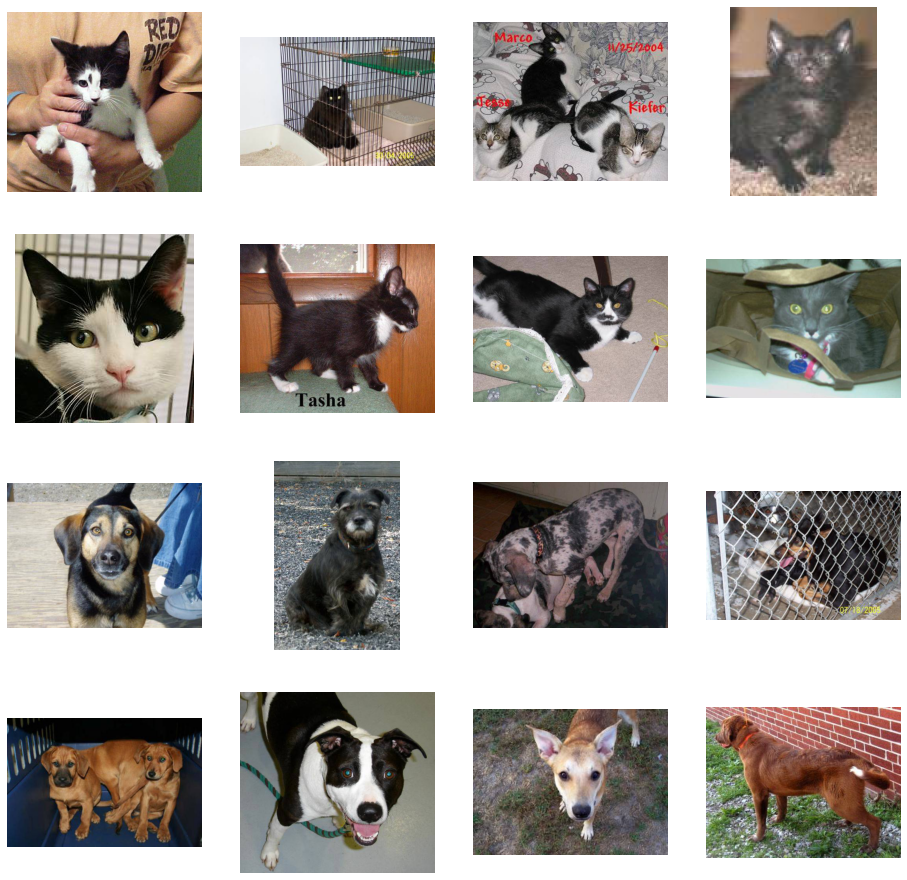

In [ ]:
# display images from the dataset
nrows = 4
ncols = 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
# pick the first 8 horse pictures
next_horse_pix = [os.path.join(Train_Cat_dir, fname) 
                for fname in Train_Cat[pic_index-8:pic_index]]
# pick the first 8 human pictures
next_human_pix = [os.path.join(Train_Dog_dir, fname) 
                for fname in Train_Dog[pic_index-8:pic_index]]

# add the horse and human pictures together in a list and plot in
# the specified number of rows and columns
for i, img_path in enumerate(next_horse_pix+next_human_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

/content/drive/MyDrive/Colab Notebooks/dogs-vs-cats-vvsmall/dogs-vs-cats-vvsmall/train/cats/cat.2969.jpg


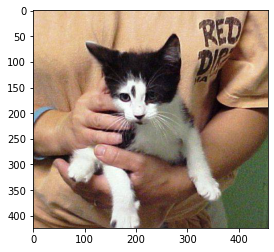

In [21]:
img = mpimg.imread(os.path.join(Train_Cat_dir, Train_Cat[0]))
print(os.path.join(Train_Cat_dir, Train_Cat[0]))
plt.imshow(img)



## Model Generating

In [4]:

train_datagen = ImageDataGenerator(
    rescale=1.0 /255.0 
              )
validation_datagen = ImageDataGenerator(
    rescale=1.0 /255.0
              )


train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/dogs-vs-cats-vvsmall/dogs-vs-cats-vvsmall/train', 
        target_size=(100, 100),  
        batch_size=32,
        class_mode='binary')



validation_generator = validation_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/dogs-vs-cats-vvsmall/dogs-vs-cats-vvsmall/validation', 
        target_size=(100, 100), 
        batch_size=32,
        class_mode='binary')



Found 6000 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.


In [16]:

model = Sequential()
model.add(Conv2D(16, (3,3), strides = 1, activation='relu', 
                 padding='same', input_shape=(100, 100, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

unit = [32, 64, 128]
for i in  unit:
  model.add(Conv2D(i, (3,3), strides = 1,
                   padding='same', activation='relu'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.2))

'''model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))'''

model.add(Flatten())
'''
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
'''
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 50, 50, 16)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 50, 50, 16)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 25, 25, 32)       

In [17]:

SGD_opt = SGD(learning_rate=0.001, momentum=0.9)

Adam_opt = Adam(learning_rate=0.001)


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 
history=model.fit( train_generator,  
                    validation_data = validation_generator,
                    epochs=30, 
                    callbacks = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                              patience=5, 
                                                              restore_best_weights=True)
                  )             

     

Epoch 1/30
188/188 [==============================] - 39s 192ms/step - loss: 0.7057 - accuracy: 0.5273 - val_loss: 0.6909 - val_accuracy: 0.5061
Epoch 2/30
188/188 [==============================] - 34s 183ms/step - loss: 0.6378 - accuracy: 0.6262 - val_loss: 0.6463 - val_accuracy: 0.6006
Epoch 3/30
188/188 [==============================] - 36s 191ms/step - loss: 0.5987 - accuracy: 0.6657 - val_loss: 0.5916 - val_accuracy: 0.6928
Epoch 4/30
188/188 [==============================] - 33s 175ms/step - loss: 0.5504 - accuracy: 0.7192 - val_loss: 0.5240 - val_accuracy: 0.7406
Epoch 5/30
188/188 [==============================] - 36s 191ms/step - loss: 0.5231 - accuracy: 0.7362 - val_loss: 0.5375 - val_accuracy: 0.7439
Epoch 6/30
188/188 [==============================] - 33s 175ms/step - loss: 0.4967 - accuracy: 0.7555 - val_loss: 0.4967 - val_accuracy: 0.7661
Epoch 7/30
188/188 [==============================] - 36s 190ms/step - loss: 0.4791 - accuracy: 0.7708 - val_loss: 0.4880 - val_ac

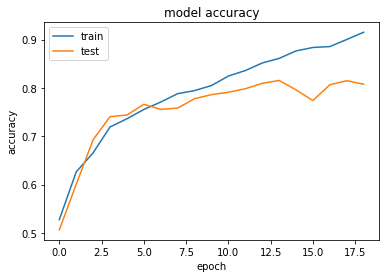

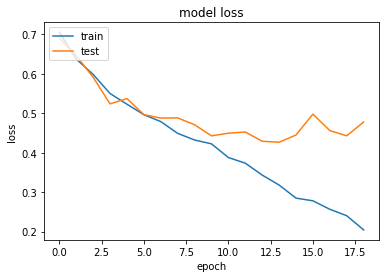

In [18]:
# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [1]:
import os
from tqdm import tqdm
from PIL import Image
folder_path = '/content/drive/MyDrive/Colab Notebooks/dogs-vs-cats-vvsmall/dogs-vs-cats-vvsmall/train/cats'
extensions = []

for filee in tqdm(os.listdir(Train_Cat_dir)):
     file_path = os.path.join(Train_Cat_dir, filee)
     print('** Path: {}  **'.format(file_path), end="\r", flush=True)
     im = Image.open(file_path)
     rgb_im = im.convert('RGB')
     if filee.split('.')[1] not in extensions:
        extensions.append(filee.split('.')[1])

NameError: ignored

## Testing without image augumentation

In [4]:
import cv2
def Load_img(v, c):
  image = []
  for file in os.listdir(v):
      f_img = mpimg.imread(os.path.join(v, c))
      #img = Image.open(f_img)
      img = cv2.resize(f_img, (100,100))
      image.append(img)
  return image

(100, 100, 3)

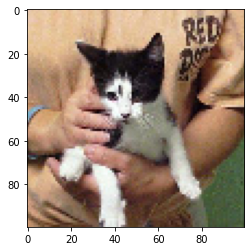

In [40]:
Train_Cat1= Load_img(Train_Cat_dir, Train_Cat)


In [ ]:
imge.shape

In [22]:

SGD_opt = SGD(learning_rate=0.001, momentum=0.9)

Adam_opt = Adam(learning_rate=0.001)


model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
 
history=model.fit( Train_Cat, Train_Dog,  
                    validation_data = (Test_Cat, Test_Dog ),
                    epochs=20, 
                    callbacks = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, 
                                          restore_best_weights=True)
                  )             

     

Epoch 1/20


ValueError: ignored

## Hyper Tuning testing